# Import packages

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import warnings
path = 'C:/Users/Nienke Tempel/Documents/Thesis/11. Model/Model'
output = 'Output23'
colors = ['#0098FA', '#0167A9', '#002C48'] # blauw blauw blauw
colorA = ["#00B8C8", "#0076C2"]
colorB = ["#6CC24A", "#009B77"]
TUblauw = "#0076C2"
import statistics
import seaborn as sns
from matplotlib.ticker import ScalarFormatter, NullFormatter
import datetime

In [ ]:
WFLOW = dict([
    ("La Meuse Goncourt", "1011"),
    ("Le Mouzon Circourt-sur-Mouzon [Villars]", "1013"),
    ("Le Vair Soulosse-sous-Saint-Élophe", "1016"),
    ("La Meuse Saint-Mihiel", "101"),
    ("La Meuse Stenay", "3"),
    ("La Bar Cheveuges", "41"),
    ("La Vence la Francheville", "42"),
    ("La Sormonne Belval", "43"),
    ("Membre Pont ", "5"),
    ("Sainte-Marie", "503"),
    ("Straimont ", "501"),
    ("La Chiers Carignan", "201"),
    ("La Chiers Longlaville", "203"),
    ("La Crusnes Pierrepont", "206"),
    ("Le Ton Écouviez", "207"),
    ("Le Loison Han-lés-Juvigny", "209"),
    ("Treignes ", "6"),
    ("Chooz ", "4"),
    ("Daverdisse ", "802"),
    ("Jemelle ", "803"),
    ("Gendron ", "801"),
    ("Hastiere", "701"),
    ("Yvoir ", "702"),
    ("Warnant ", "703"),
    ("Modave ", "704"),
    ("Ortho ", "1002"),
    ("Mabompre ", "1003"),
    ("Tabreux ", "10"),
    ("Wiheries ", "903"),
    ("Salzinnes ", "9"),
    ("Huccorgne ", "13"),
    ("Amay ", "1401"),
    ("Martinrive ", "11"),
    ("Chaudfontaine Pisc ", "12"),
    ("Maastricht", "16"),
])

In [7]:
WFLOW_id = [int(value) for key, value in WFLOW.items()]

meuse_names_be2 = ['Membre Pont ', 'Straimont ', 'Treignes ', 'Chooz ', 'Daverdisse ', 'Jemelle ', 'Hastiere', 'Warnant ', 'Ortho ', 'Wiheries ', 'Salzinnes ', 'Huccorgne ', 'Amay ', 'Maastricht']
meuse_names_fr = ['La Meuse Goncourt', 'Le Mouzon Circourt-sur-Mouzon [Villars]', 'Le Vair Soulosse-sous-Saint-Élophe', 'La Meuse Saint-Mihiel', 'La Meuse Stenay', 'La Chiers Longlaville', 'Le Loison Han-lés-Juvigny', 'La Chiers Carignan', 'La Bar Cheveuges', 'La Vence la Francheville']
meuse_names_fr = ['La Meuse Goncourt', 'Le Mouzon Circourt-sur-Mouzon [Villars]', 'Le Vair Soulosse-sous-Saint-Élophe', 'La Meuse Saint-Mihiel', 'La Meuse Stenay', 'La Chiers Longlaville', 'La Chiers Carignan', 'La Bar Cheveuges', 'La Vence la Francheville']
meuse_names_total = meuse_names_be2 + meuse_names_fr
meuse_id = []

for i in range(len(meuse_names_total)):
    value = WFLOW[meuse_names_total[i]]
    meuse_id.append(int(float(value)))
    
print(len(meuse_id))

23


In [4]:
WFLOW_inv = {value: key for key, value in WFLOW.items()}
print(WFLOW_inv)

{'1011': 'La Meuse Goncourt', '1013': 'Le Mouzon Circourt-sur-Mouzon [Villars]', '1016': 'Le Vair Soulosse-sous-Saint-Élophe', '101': 'La Meuse Saint-Mihiel', '3': 'La Meuse Stenay', '41': 'La Bar Cheveuges', '42': 'La Vence la Francheville', '43': 'La Sormonne Belval', '5': 'Membre Pont ', '503': 'Sainte-Marie', '501': 'Straimont ', '201': 'La Chiers Carignan', '203': 'La Chiers Longlaville', '206': 'La Crusnes Pierrepont', '207': 'Le Ton Écouviez', '209': 'Le Loison Han-lés-Juvigny', '6': 'Treignes ', '4': 'Chooz ', '802': 'Daverdisse ', '803': 'Jemelle ', '801': 'Gendron ', '701': 'Hastiere', '702': 'Yvoir ', '703': 'Warnant ', '704': 'Modave ', '1002': 'Ortho ', '1003': 'Mabompre ', '10': 'Tabreux ', '903': 'Wiheries ', '9': 'Salzinnes ', '13': 'Huccorgne ', '1401': 'Amay ', '11': 'Martinrive ', '12': 'Chaudfontaine Pisc ', '16': 'Maastricht'}


In [5]:
df_area = pd.read_csv(f'C:/Users/Nienke Tempel/Documents/Thesis/6. Code/3_Meuse/1_Data/Stations_area.csv', delimiter=',',skipinitialspace=True)
df_area.index = df_area['Station']
df_area["area_m2"] = df_area["area_km2"] * 10**6
display(df_area)

,wflow_id,wflow_id.1,sub_map,X_E4326,Y_E4326,area_km2,Station,area_m2
Station,,,,,,,,
Chooz,4,4.0,6.0,4.806525672,50.0921333,10120.00,Chooz,1.012000e+10
Membre Pont,5,5.0,5.0,4.902009996,49.86376736,1226.00,Membre Pont,1.226000e+09
Treignes,6,6.0,1.0,4.675974649,50.08862648,548.00,Treignes,5.480000e+08
Salzinnes Ronet,9,9.0,4.0,4.832912753,50.45995448,2842.00,Salzinnes Ronet,2.842000e+09
Tabreux,10,10.0,4.0,5.53511135,50.43797149,1607.00,Tabreux,1.607000e+09
...,...,...,...,...,...,...,...,...
La Semoy à Haulmé,506,506.0,1.0,4.7871654,49.86187,1338.63,La Semoy à Haulmé,1.338630e+09
La Chiers à Carignan,201,201.0,5.0,5.159217154,49.6291412,1978.31,La Chiers à Carignan,1.978310e+09
La Meuse à Stenay,3,3.0,9.0,5.177971662,49.49388953,3914.60,La Meuse à Stenay,3.914600e+09


# Trend analysis

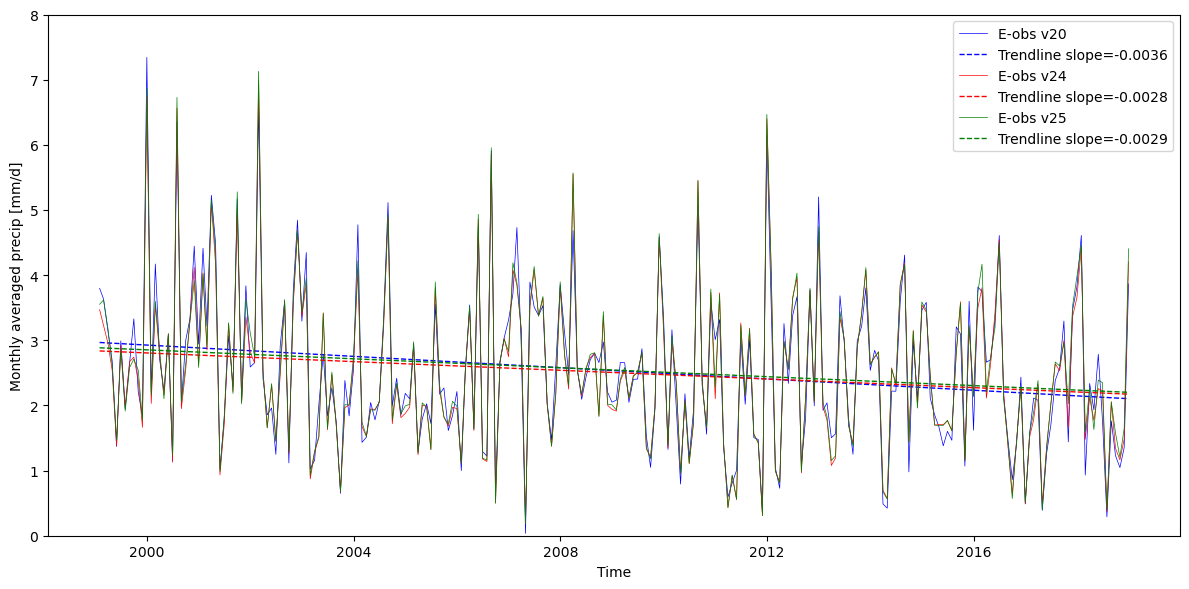

In [8]:
import matplotlib.pyplot as plt
import numpy as np

checkrun = range(1)

fig, ax = plt.subplots(figsize=(12, 6))
l = 0.5
l2 = 1

for i in checkrun:
    data = pd.read_csv(f'C:/Users/Nienke Tempel/Documents/Thesis/11. Model/Model/flextopo_trend_analysis_v0/output.csv')
    data = data.set_index(pd.to_datetime(data['time'], format='%Y-%m-%d'))
    monthly_mean = data['P_16'].resample('M').mean()
    ax.plot(monthly_mean.index, monthly_mean.values, label='E-obs v20', color='blue', linewidth=l)
    x = np.arange(len(monthly_mean))
    y = monthly_mean.values
    slope, intercept = np.polyfit(x, y, 1)
    ax.plot(monthly_mean.index, slope*x+intercept, '--', color='blue', linewidth=l2, label=f'Trendline slope={slope:.4f}')

for i in checkrun:
    data = pd.read_csv(f'C:/Users/Nienke Tempel/Documents/Thesis/11. Model/Model/flextopo_trend_analysis/output.csv')
    data = data.set_index(pd.to_datetime(data['time'], format='%Y-%m-%d'))
    monthly_mean = data['P_16'].resample('M').mean()
    ax.plot(monthly_mean.index, monthly_mean.values, label='E-obs v24', color='red', linewidth=l)
    x = np.arange(len(monthly_mean))
    y = monthly_mean.values
    slope, intercept = np.polyfit(x, y, 1)
    ax.plot(monthly_mean.index, slope*x+intercept, '--', color='red', linewidth=l2, label=f'Trendline slope={slope:.4f}')

for i in checkrun:
    data = pd.read_csv(f'C:/Users/Nienke Tempel/Documents/Thesis/11. Model/Model/flextopo_trend_analysis_v2/output.csv')
    data = data.set_index(pd.to_datetime(data['time'], format='%Y-%m-%d'))
    monthly_mean = data['P_16'].resample('M').mean()
    ax.plot(monthly_mean.index, monthly_mean.values, label='E-obs v25', color='green', linewidth=l)
    x = np.arange(len(monthly_mean))
    y = monthly_mean.values
    slope, intercept = np.polyfit(x, y, 1)
    ax.plot(monthly_mean.index, slope*x+intercept, '--', color='green', linewidth=l2, label=f'Trendline slope={slope:.4f}')

ax.set_xlabel('Time')
ax.set_ylabel('Monthly averaged precip [mm/d]')
ax.set_ylim([0, 8])
ax.legend()
plt.tight_layout()
plt.savefig(f'1_Output/{output}/Trend/Total_time.pdf')  

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

checkrun = range(1)

fig, ax = plt.subplots(figsize=(12, 6))
l = 0.5
l2 = 4

for i in checkrun:
    data = pd.read_csv(f'C:/Users/Nienke Tempel/Documents/Thesis/11. Model/Model/flextopo_trend_analysis_v3/output.csv')
    data = data.set_index(pd.to_datetime(data['time'], format='%Y-%m-%d'))
    monthly_mean = data['P_16'].resample('M').mean()
    ax.plot(monthly_mean.index, monthly_mean.values, label='Jaarlijks', color='orange', linewidth=l*2)
    x = np.arange(len(monthly_mean))
    y = monthly_mean.values
    slope, intercept = np.polyfit(x, y, 1)
    ax.plot(monthly_mean.index, slope*x+intercept, '--', color='orange', linewidth=l2, label=f'Trendline slope={slope:.4f}')
    
    startdatum = data.index.min()
    einddatum = data.index.max()

for i in checkrun:
    data = pd.read_csv(f'C:/Users/Nienke Tempel/Documents/Thesis/11. Model/Model/flextopo_trend_analysis_v0/output.csv')
    data = data.set_index(pd.to_datetime(data['time'], format='%Y-%m-%d'))
    monthly_mean = data['P_16'].resample('M').mean()
    ax.plot(monthly_mean.index, monthly_mean.values, label='E-obs v20', color='blue', linewidth=l)
    
    data = data.loc[startdatum:einddatum]
    monthly_mean = data['P_16'].resample('M').mean()
    
    x = np.arange(len(monthly_mean))
    y = monthly_mean.values
    slope, intercept = np.polyfit(x, y, 1)
    ax.plot(monthly_mean.index, slope*x+intercept, '--', color='blue', linewidth=l2, label=f'Trendline slope={slope:.4f}')

for i in checkrun:
    data = pd.read_csv(f'C:/Users/Nienke Tempel/Documents/Thesis/11. Model/Model/flextopo_trend_analysis/output.csv')
    data = data.set_index(pd.to_datetime(data['time'], format='%Y-%m-%d'))
    monthly_mean = data['P_16'].resample('M').mean()
    ax.plot(monthly_mean.index, monthly_mean.values, label='E-obs v24', color='red', linewidth=l)
    
    data = data.loc[startdatum:einddatum]
    monthly_mean = data['P_16'].resample('M').mean()
    
    x = np.arange(len(monthly_mean))
    y = monthly_mean.values
    slope, intercept = np.polyfit(x, y, 1)
    ax.plot(monthly_mean.index, slope*x+intercept, '--', color='red', linewidth=l2, label=f'Trendline slope={slope:.4f}')

for i in checkrun:
    data = pd.read_csv(f'C:/Users/Nienke Tempel/Documents/Thesis/11. Model/Model/flextopo_trend_analysis_v2/output.csv')
    data = data.set_index(pd.to_datetime(data['time'], format='%Y-%m-%d'))
    monthly_mean = data['P_16'].resample('M').mean()
    ax.plot(monthly_mean.index, monthly_mean.values, label='E-obs v25', color='green', linewidth=l)
    
    data = data.loc[startdatum:einddatum]
    monthly_mean = data['P_16'].resample('M').mean()
    
    x = np.arange(len(monthly_mean))
    y = monthly_mean.values
    slope, intercept = np.polyfit(x, y, 1)
    ax.plot(monthly_mean.index, slope*x+intercept, '--', color='green', linewidth=l2, label=f'Trendline slope={slope:.4f}')
    


ax.set_xlabel('Time')
ax.set_ylabel('Monthly averaged precip [mm/d]')
ax.set_ylim([0, 8])
ax.legend()
plt.tight_layout()
plt.savefig(f'1_Output/{output}/Trend/2005_2017.pdf')  

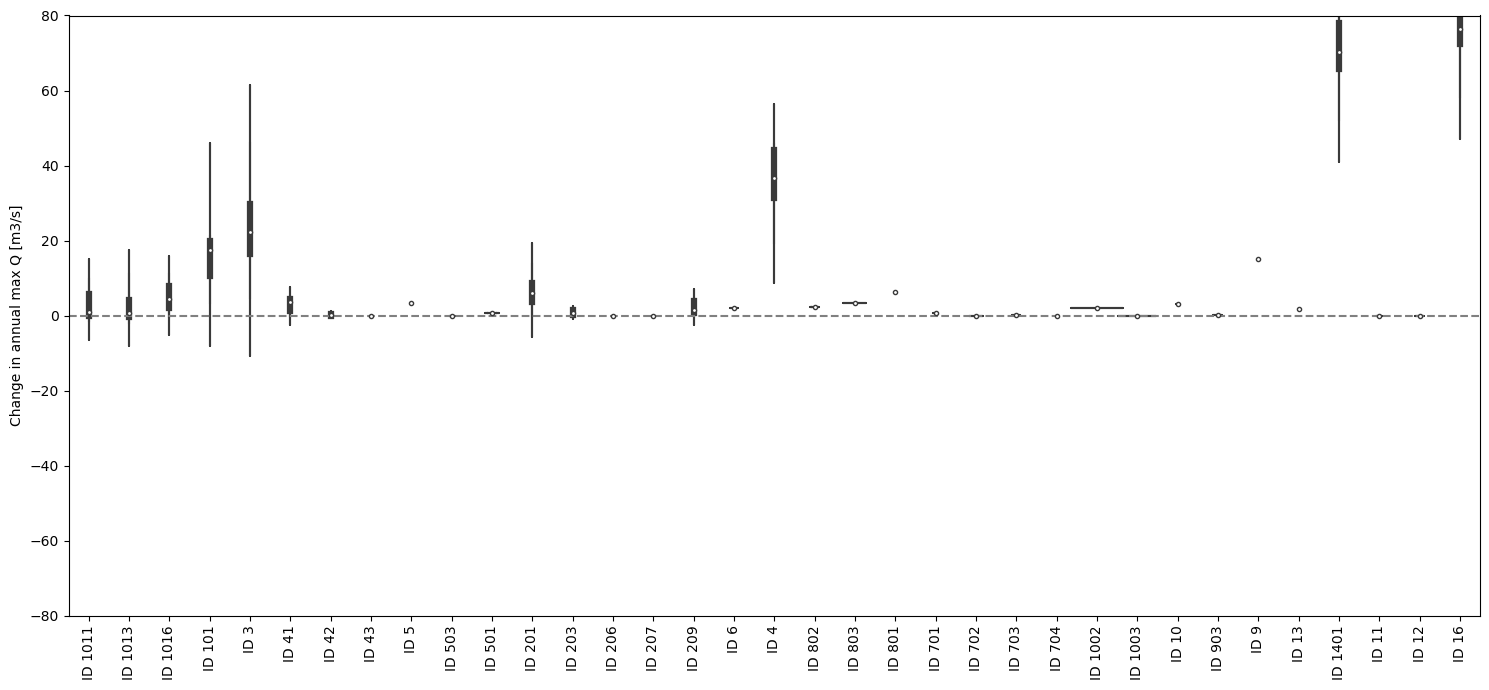

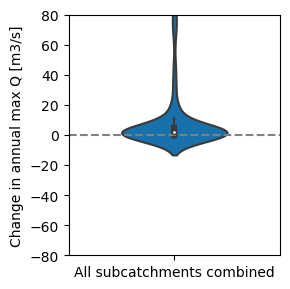

In [12]:
plt.figure(figsize=(15, 7))
sns.violinplot(data=mean_annual_diff, color=TUblauw, width=1.3)
plt.xticks(rotation=90)
plt.ylim(-80, 80)
plt.axhline(0, color='grey', linestyle='--')
plt.ylabel('Change in annual max Q [m3/s]')
plt.tight_layout()
plt.savefig(f'1_Output/{output}/Change_in_max_Q_m3.png')
plt.show()

combined_perc = pd.concat([mean_annual_diff[col] for col in mean_annual_diff.columns])

plt.figure(figsize=(3, 3))
sns.violinplot(data=combined_perc, color=TUblauw, width=0.5)
plt.ylim(-80, 80)
plt.axhline(0, color='grey', linestyle='--')
plt.ylabel('Change in annual max Q [m3/s]')
plt.xticks([0], ['All subcatchments combined'])
plt.tight_layout()
plt.savefig(f'1_Output/{output}/Change_in_max_Q_m3_combined.png')
plt.show()

In [94]:
data = pd.read_csv(f'C:/Users/Nienke Tempel/Documents/Thesis/11. Model/Model/flextopo_update_sumax_0/output.csv')
column_list = data.columns.tolist()
print(column_list)

['time', 'Q_1', 'Q_1011', 'Q_1013', 'Q_1016', 'Q_206', 'Q_209', 'Q_207', 'Q_203', 'Q_41', 'Q_503', 'Q_42', 'Q_43', 'Q_501', 'Q_802', 'Q_6', 'Q_1002', 'Q_1003', 'Q_803', 'Q_701', 'Q_903', 'Q_703', 'Q_702', 'Q_704', 'Q_11', 'Q_13', 'Q_12', 'Q_2001', 'Q_2007', 'Q_2002', 'Q_2003', 'Q_2008', 'Q_2004', 'Q_2005', 'Q_2009', 'Q_2010', 'Q_2011', 'Q_2012', 'Q_2013', 'Q_2014', 'Q_2006', 'Q_101', 'Q_201', 'Q_5', 'Q_801', 'Q_10', 'Q_9', 'Q_3', 'Q_4', 'Q_1401', 'Q_16', 'Qall_1011', 'Qall_1013', 'Qall_1016', 'Qall_101', 'Qall_206', 'Qall_209', 'Qall_3', 'Qall_207', 'Qall_203', 'Qall_201', 'Qall_41', 'Qall_503', 'Qall_42', 'Qall_43', 'Qall_501', 'Qall_5', 'Qall_802', 'Qall_6', 'Qall_4', 'Qall_1002', 'Qall_1003', 'Qall_803', 'Qall_701', 'Qall_801', 'Qall_903', 'Qall_703', 'Qall_702', 'Qall_10', 'Qall_704', 'Qall_9', 'Qall_11', 'Qall_1401', 'Qall_13', 'Qall_12', 'Qall_16', 'Qall_2001', 'Qall_2007', 'Qall_2002', 'Qall_2003', 'Qall_2008', 'Qall_2004', 'Qall_2005', 'Qall_2009', 'Qall_2010', 'Qall_2011', 'Qa